In [1]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def read_and_transform(path, dims, rgbc=1, bw=False, invert=False, save=False):
    # Open image
    img_split = Image.open(path).split()

    img = img_split[rgbc]

    # Scale back up using NEAREST to original size
    if bw:
        img = img.convert("L")

    # Resize smoothly down to 16x16 pixels
    img_small = img.resize(dims, resample=Image.Resampling.BILINEAR)

    if invert:
        img_small = ImageOps.invert(img_small)

    img_small.resize(img.size, Image.Resampling.NEAREST)

    if save:
        split_path = path.split('/')
        dir_path = split_path[0] + '/' + f'size{dims[0]}x{dims[1]}'
        os.makedirs(dir_path, exist_ok=True)
        img_small.save(dir_path + '/' + split_path[-1])
    
    return img_small


def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

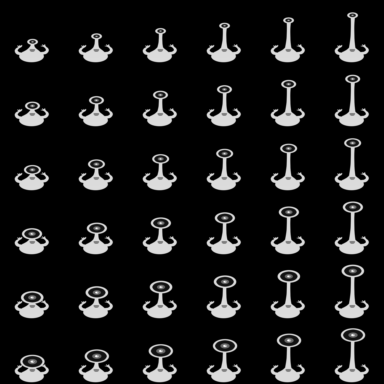

In [13]:
dims = [64, 64]

imgs = {}
for fam_ind in [3]:
    imgs[fam_ind] = []
    for dim1 in range(1, 7):
        for dim2 in range(1, 7):
            imgs[fam_ind].append(read_and_transform(f'monsters/original/f{fam_ind}_{dim1}_{dim2}.png', rgbc=2, dims=dims, save=True, invert=True, bw=True))

# display(image_grid(imgs[1], 6, 6))
# display(image_grid(imgs[2], 6, 6))
display(image_grid(imgs[3], 6, 6))
# display(image_grid(imgs[4], 6, 6))